In [16]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import heapq

def rgb2gray(rgb):
    if len(rgb.shape) == 3:
        r, g, b = rgb[:, :, 0], rgb[:, :, 1], rgb[:, :, 2]
        return 0.2989 * r + 0.5870 * g + 0.1140 * b
    return rgb

img = io.imread("lena.jpg")
img = np.array(img)
img = rgb2gray(img)

#laplace aus template
laplace1 = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])
# laplace aus Vorlesung
laplace2 = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
])

box = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
]) / 9.0

fm = laplace1

In [17]:
def filter1(img, filter, off):
    height, width = img.shape
    filter_size = filter.shape[0]
    
    num_rows = (height - filter_size) // off + 1
    num_cols = (width  - filter_size) // off + 1

    output = np.zeros((num_rows, num_cols), dtype=np.int32)

    for row in range(num_rows):
        for col in range(num_cols):
            #Filterecken bestimmen
            # ecke oben links 
            start_y = row * off
            start_x = col * off
            
            # ecke unten rechts 
            end_y = start_y + filter_size
            end_x = start_x + filter_size

            #Maske
            window = img[start_y:end_y, start_x:end_x]
            conv_value = np.sum(window * filter)
            output[row, col] = conv_value

    # Werte auf auf 0-255 schieben
    output_clipped = np.clip(output, 0, 255).astype(np.uint8)
    return output_clipped


In [18]:
import numpy as np

def filter2(img, filter, off, edge):
    height, width = img.shape
    filter_size = filter.shape[0]
    pad = filter_size // 2

    # Bild anlegen
    num_rows = ((height + 2*pad - filter_size) // off) + 1
    num_cols = ((width  + 2*pad - filter_size) // off) + 1
    output = np.zeros((num_rows, num_cols), dtype=np.int32)

    # padding einfügen
    if edge == 'min':
        padded = np.pad(img, ((pad,pad),(pad,pad)), mode='constant', constant_values=0)
    elif edge == 'max':
        padded = np.pad(img, ((pad,pad),(pad,pad)), mode='constant', constant_values=255)
    elif edge == 'continue':
        padded = np.pad(img, ((pad,pad),(pad,pad)), mode='edge')
    else:
        raise ValueError(f"Unbekannter edge-Modus: {edge!r}")


    for row in range(num_rows):
        for col in range(num_cols):
            
            # ecke oben links
            start_y = row * off
            start_x = col * off
            
            # ecke unten rechts
            end_y = start_y + filter_size
            end_x = start_x + filter_size

            window = padded[start_y:end_y, start_x:end_x]
            output[row, col] = np.sum(window * filter)

    output_clipped = np.clip(output, 0, 255).astype(np.uint8)
    return output_clipped


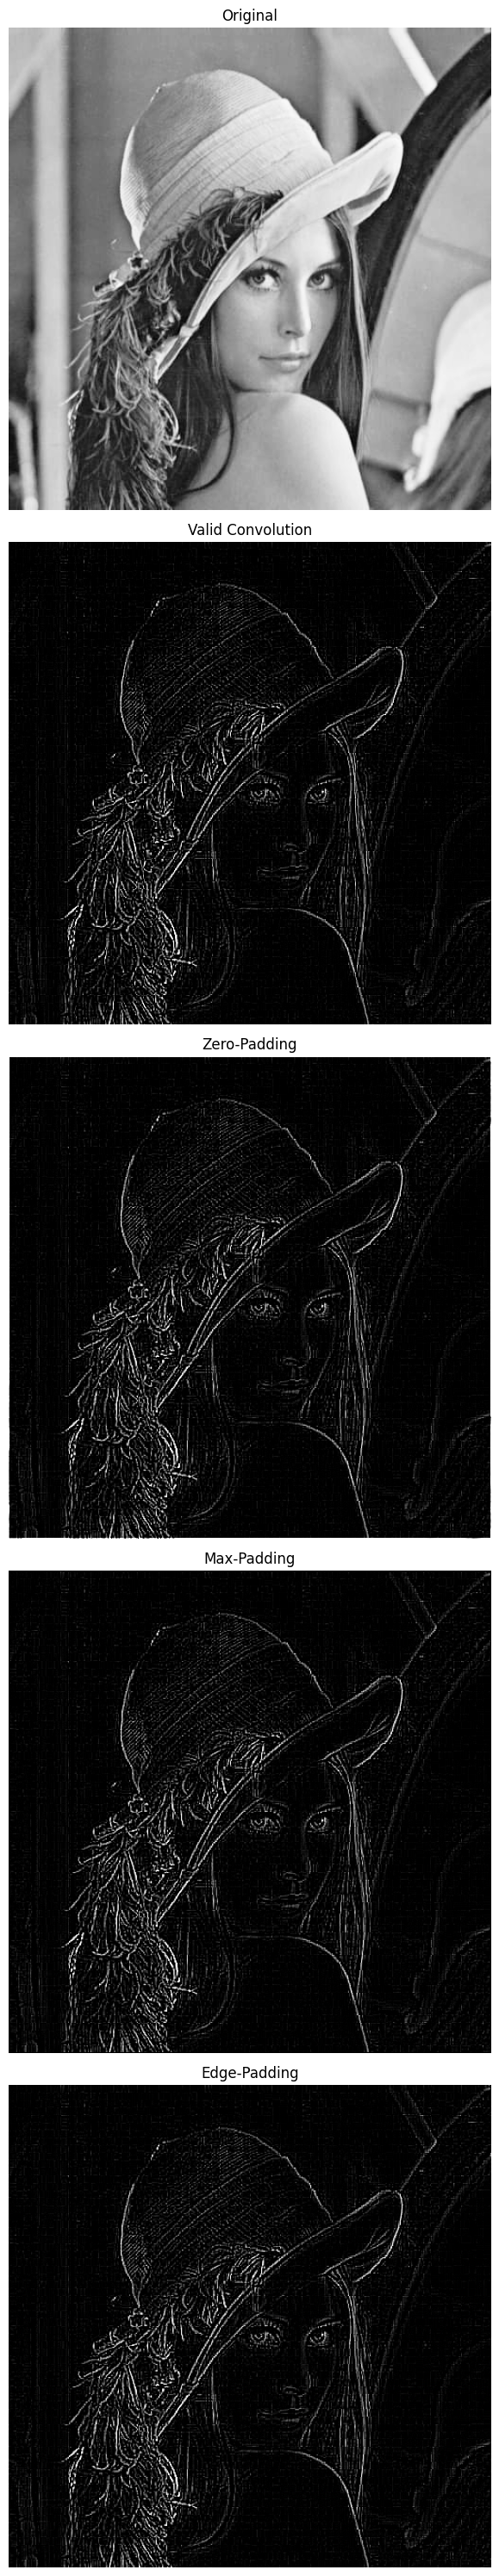

In [19]:
# no padding
pepper_out = filter1(img, fm, off=1)
# min
out2 = filter2(img, fm, off=1, edge='min')
# max
out3 = filter2(img, fm, off=1, edge='max')
# continue
out4 = filter2(img, fm, off=1, edge='continue')


fig, axes = plt.subplots(5, 1, figsize=(12, 30))

axes[0].imshow(img, cmap=cm.Greys_r)
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(pepper_out, cmap=cm.Greys_r)
axes[1].set_title('Valid Convolution')
axes[1].axis('off')

axes[2].imshow(out2, cmap=cm.Greys_r)
axes[2].set_title('Zero-Padding')
axes[2].axis('off')

axes[3].imshow(out3, cmap=cm.Greys_r)
axes[3].set_title('Max-Padding')
axes[3].axis('off')

axes[4].imshow(out4, cmap=cm.Greys_r)
axes[4].set_title('Edge-Padding')
axes[4].axis('off')

plt.tight_layout()
plt.show()


**Nennen Sie die Arten und Eigenschaften von linearen Filtern.**

- Tiefpass-Filter: Lässt nur niedrige werte durch und filtert hohe heraus 
- Hochpass-Filter: Lässt nur hohe Werte durch und filtert tiefe heraus
- Bandpass-Filter: Lässt nur Werte in einem speziellen band durch

**Was ist der Unterschied zwischen linearen und nichtlinearen Filtern?**  

Lineare Filter:  

Nicht-Lineare Filter:  

In [20]:
def medianFilter(in_image, filtersize, offset):
    h, w = in_image.shape
    filtersize

    out_h = ((h - filtersize) // offset) + 1
    out_w = ((w - filtersize) // offset) + 1

    out_image = np.zeros((out_h, out_w), dtype=np.uint8)

    # Fensterfläche
    window_size = filtersize * filtersize
    pops = (window_size - 1) // 2

    for i in range(out_h):
        for j in range(out_w):
            # Ausschnitt bestimmen
            y0 = i * offset
            x0 = j * offset
            window = in_image[y0:y0 + filtersize, x0:x0 + filtersize]

            # in liste und heap umwandeln
            flat = window.flatten().tolist()
            heapq.heapify(flat)

            for _ in range(pops):
                heapq.heappop(flat)
            median = heapq.heappop(flat)

            out_image[i, j] = median

    return out_image


def recursive_median_filter(image, iterations, filtersize=3, offset=1):
    filtered_image = image.copy()
    for _ in range(iterations):
        filtered_image = medianFilter(filtered_image, filtersize, offset)
    return filtered_image



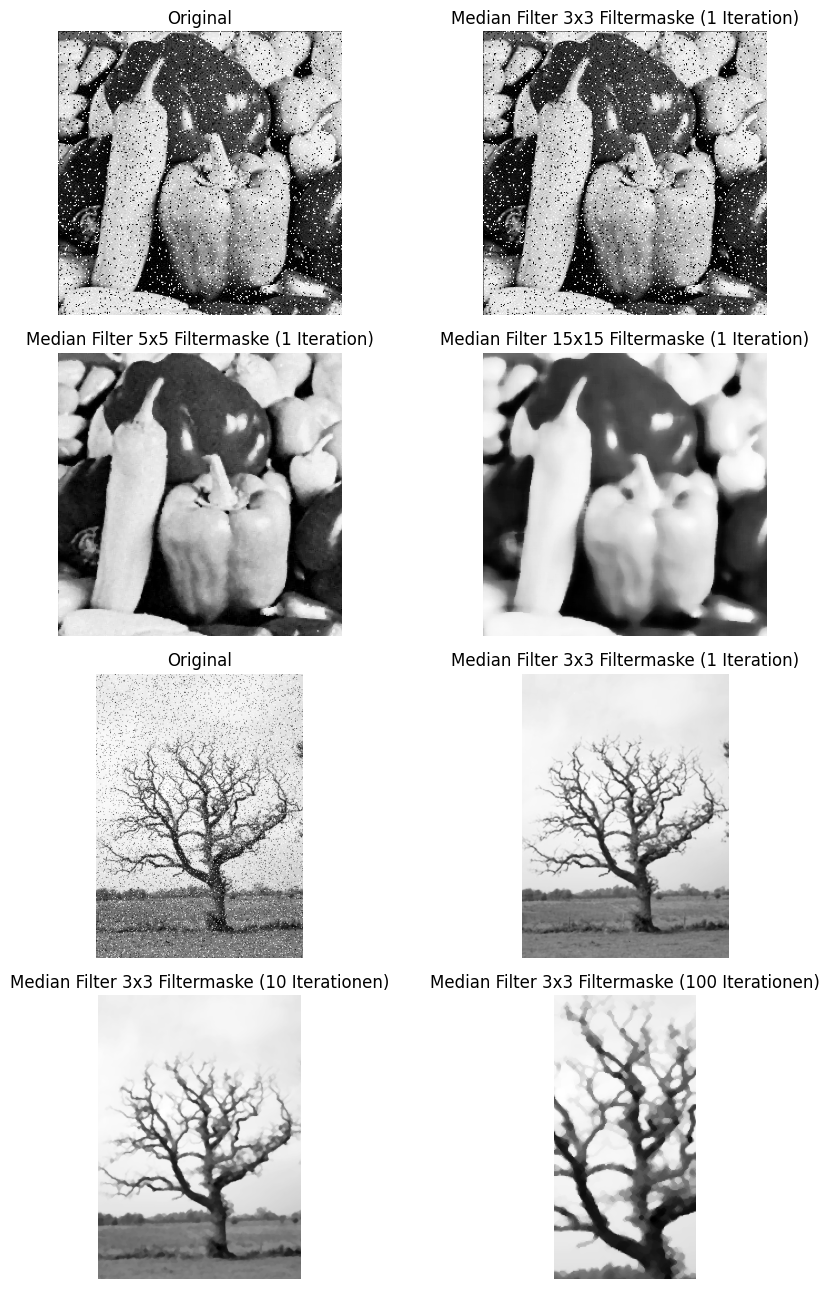

In [ ]:
pepper_img = io.imread("pepper.jpg")
pepper_img = np.array(pepper_img)

tree_img = io.imread("tree.png")
tree_img = np.array(tree_img)

pepper_out3 = medianFilter(pepper_img, 3, 1)
pepper_out5 = medianFilter(pepper_img, 5, 1)
pepper_out15 = medianFilter(pepper_img, 15, 1)

tree_out = medianFilter(tree_img, 3, 1)
tree_out10 = recursive_median_filter(tree_img, 10)
tree_out100 = recursive_median_filter(tree_img, 100)



fig, axes = plt.subplots(4, 2, figsize=(10, 13))

axes[0, 0].imshow(pepper_img, cmap=cm.Greys_r)
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')

axes[0, 1].imshow(pepper_out3, cmap=cm.Greys_r)
axes[0, 1].set_title('Median Filter 3x3 Filtermaske (1 Iteration)')
axes[0, 1].axis('off')

axes[1, 0].imshow(pepper_out5, cmap=cm.Greys_r)
axes[1, 0].set_title('Median Filter 5x5 Filtermaske (1 Iteration)')
axes[1, 0].axis('off')

axes[1, 1].imshow(pepper_out15, cmap=cm.Greys_r)
axes[1, 1].set_title('Median Filter 15x15 Filtermaske (1 Iteration)')
axes[1, 1].axis('off')

axes[2, 0].imshow(tree_img, cmap=cm.Greys_r)
axes[2, 0].set_title('Original')
axes[2, 0].axis('off')

axes[2, 1].imshow(tree_out, cmap=cm.Greys_r)
axes[2, 1].set_title('Median Filter 3x3 Filtermaske (1 Iteration)')
axes[2, 1].axis('off')

axes[3, 0].imshow(tree_out10, cmap=cm.Greys_r)
axes[3, 0].set_title('Median Filter 3x3 Filtermaske (10 Iterationen)')
axes[3, 0].axis('off')

axes[3, 1].imshow(tree_out100, cmap=cm.Greys_r)
axes[3, 1].set_title('Median Filter 3x3 Filtermaske (100 Iterationen)')
axes[3, 1].axis('off')


plt.tight_layout()
plt.show()

**Warum ist es beim Medianﬁlter sinnvoll für die Sortierung Heap Sort zu verwenden?**  
- Mit heapsort ist keine vollstöndige sortierung nötig. Es wird lediglich n/2 -1 gepopt um dann den median an obersterstelle des heaps zu haben


**Untersuchen Sie, welche Eﬀekte bei mehrmaligem Anwenden eines Filters auf das jeweilige Ergebnisbild auftreten.**  
- Bei mehrmaligem anwenden, werden die bilder immer kleiner, da immer filtersize-1 pixel in der horizontalen sowie vertikalen verloren gehen, da es kein Padding gibt außerdem wird das bild bei jeder iteration verwaschener

**Welche Eﬀekte treten bei grossen und bei kleinen Filtermasken auf?**
- je größer die Filtermaske wird, desto verwaschener wird das bild
